In [83]:
import plotly
import plotly.express as px 
import plotly.figure_factory as ff
import plotly.graph_objects as go


In [84]:
import re

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
os.listdir()

['cleaned_data_csv.csv',
 'netflix.csv.csv',
 'netflix_analysis_by_montiprem.ipynb',
 'netflix_csv.csv',
 'netflix_movies.csv',
 'netflix_titles - Copy.csv',
 'netflix_titles.csv',
 'netflix_tvshow.csv',
 'practice.ipynb']

In [3]:
data = pd.read_csv('netflix_titles.csv')

In [9]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [10]:
data.shape

(8807, 12)

In [11]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [14]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [15]:
data.isna().sum().sort_values(ascending= False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [111]:
# Get the number of null values in each column
null_values = data.isnull().sum()
total_values = data.shape[0]

# Get the percentage of null values in each column
null_percentage = null_values / total_values* 100

print(null_percentage)

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


In [16]:
# Percentage of total null values in dataset
data.isnull().sum().sort_values(ascending= False)/ data.shape[0] * 100


director        29.908028
country          9.435676
cast             9.367549
date_added       0.113546
rating           0.045418
duration         0.034064
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [17]:
data['director'].value_counts().head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

## Movies aand Tv Show distribution

In [18]:
data.type

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

In [19]:

data['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

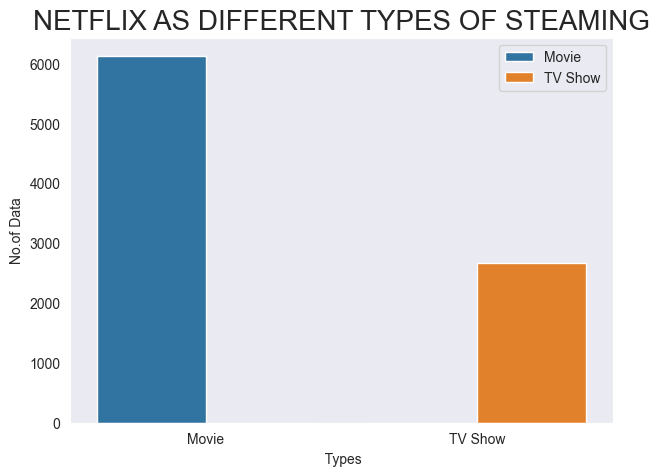

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [206]:
plt.figure(figsize=(7,5))
plt.grid(None)
sns.countplot(x='type',data=data,hue='type')
plt.title('NETFLIX AS DIFFERENT TYPES OF STEAMING',fontsize=20) #Note labelling the title
plt.xlabel(' Types',fontsize=10)  #Note labelling the x-label
plt.ylabel('No.of Data',fontsize=10)       #Note labelling the y-label
plt.legend(fontsize= 10)                             #note labels for legends
plt.show()
data['type'].value_counts()

### Checking gender imbalance


In [204]:


values = data.type.value_counts(normalize=True).values
labels = data.type.value_counts(normalize=True).index
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.6, title='Movies Vs Tv shows')])
fig.show()
data['type'].value_counts(normalize=True)

type
Movie      0.696928
TV Show    0.303072
Name: proportion, dtype: float64

In [152]:
# # Get the number of movies and TV shows
# movies = data['type'].value_counts(normalize = True)['Movie']
# tv_shows = data['type'].value_counts(normalize = True)['TV Show']

# # Create a bar graph
# plt.bar(["Movies", "TV Shows"], [movies, tv_shows])
# plt.title("Number of Movies and TV Shows")
# plt.xlabel("Type", fontsize = 20 )
# plt.ylabel("Count", fontsize = 20)
# plt.show()

In [46]:

values = data.rating.value_counts().values
labels = data.rating.value_counts().index
fig = go.Figure(data=[go.Pie(labels=labels,hole= 0.5 ,values=values,title='rating')])
fig.show()
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

## Top Rating 

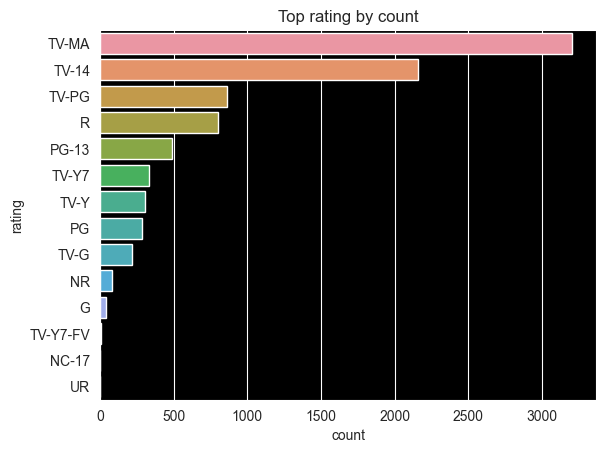

In [45]:
ax=sns.barplot(x = data.rating.value_counts(), y =data.rating.value_counts().index , data = data , orient ="h")
ax.set_title('Top rating by count')
ax.set_facecolor('black')

In [23]:
data['country'].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [24]:
data.country.value_counts().head(10)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

In [25]:
data.release_year.value_counts().head(15)

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
Name: count, dtype: int64

# Analysis of Directors

Next we try to look into the director field which is compound field which needs to be exploded
1. Finding the top 10 directors who produced more movies/tv shows
2. Finding the range of rating categories produced by those directors

In [43]:
data['director'].replace(np.NaN,"Unknown", inplace=True)

director
Unknown                   2621
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Youssef Chahine             12
Name: count, dtype: int64

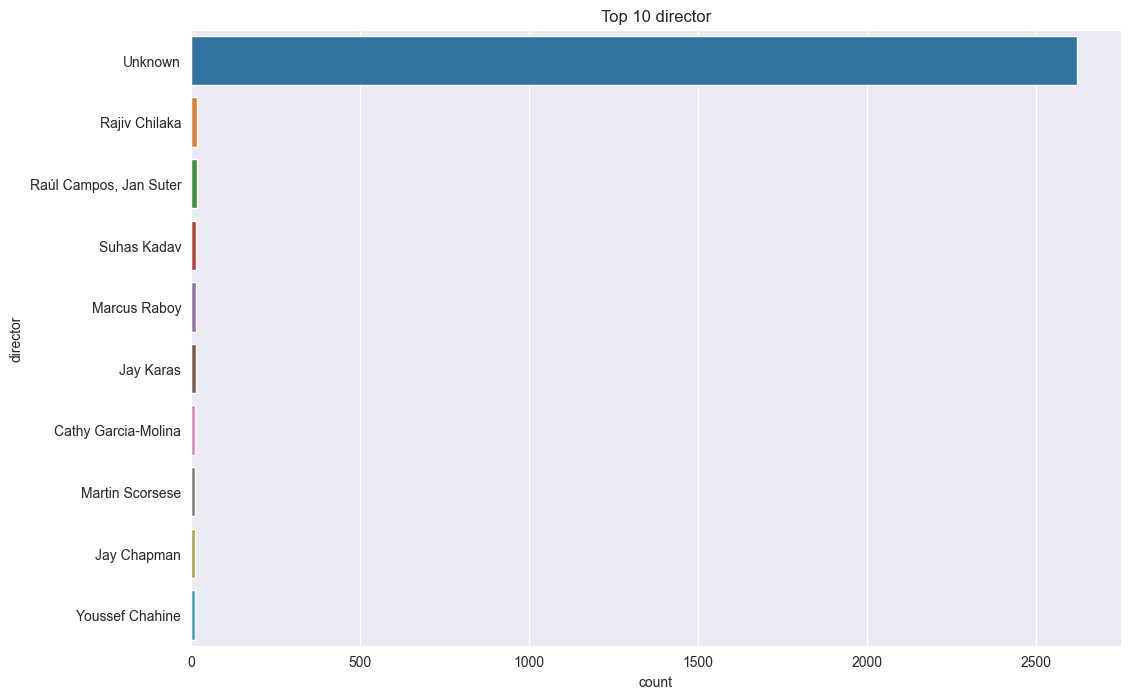

In [250]:
plt.rcParams['font.size'] = 10
plt.figure(figsize=(12,8))
ax = sns.countplot(y ="director",data = data,order = data.director.value_counts().index[0:10])
ax.set_title('Top 10 director')
ax.set_xlabel('count')
ax.set_ylabel('director')
data.director.value_counts().head(10)

It is evident that most of the film's director is **unkonwn because of missing data**



# Analysis on year and rating of movies and shows

1. Comparison between time chart of movie/shows released year and added into netflix
2. Finding the No. of movies/shows ratings by year added into netflix

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
Name: count, dtype: int64

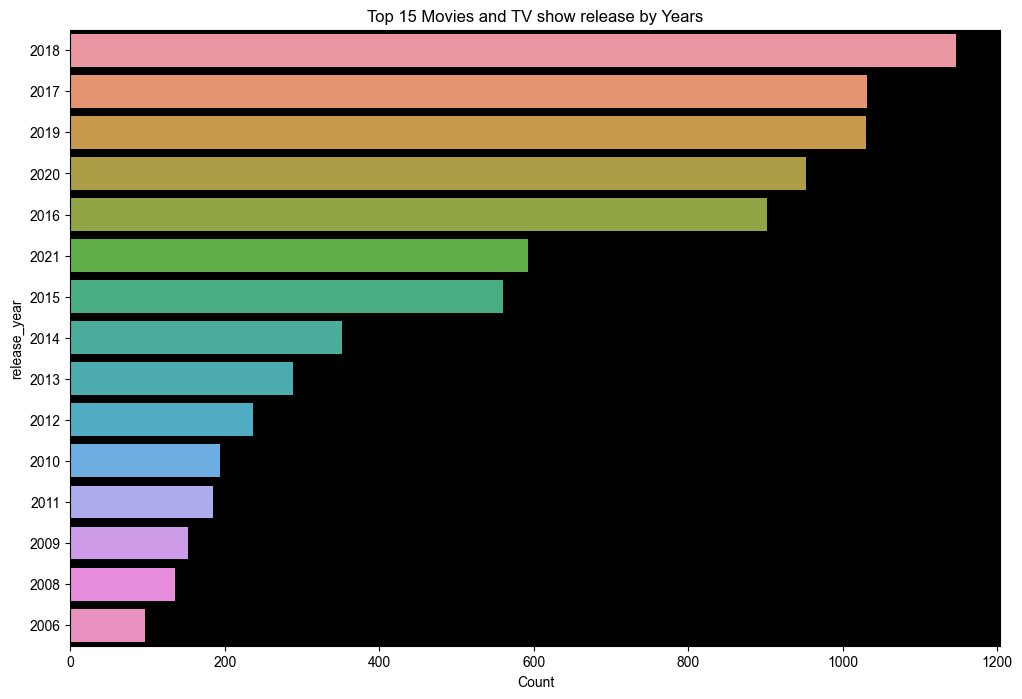

In [27]:
plt.rcParams['font.size'] = 10
plt.figure(figsize=(12,8))
ax = sns.countplot(y ="release_year",data = data,order = data.release_year.value_counts().index[0:15])
ax.set_title('Top 15 Movies and TV show release by Years')
ax.set_xlabel('Count')
ax.set_ylabel('release_year')
ax.set_facecolor('black')
sns.set_style('darkgrid')
plt.rcParams['figure.facecolor'] = '#ffffff'


data.release_year.value_counts().head(15)

Highest Release in 2018 followed by 2017 and 2019

## 4.WHICH GENRES MOVIES WERE RELEASED MOSTLY IN NETFLIX PLATFORM?

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

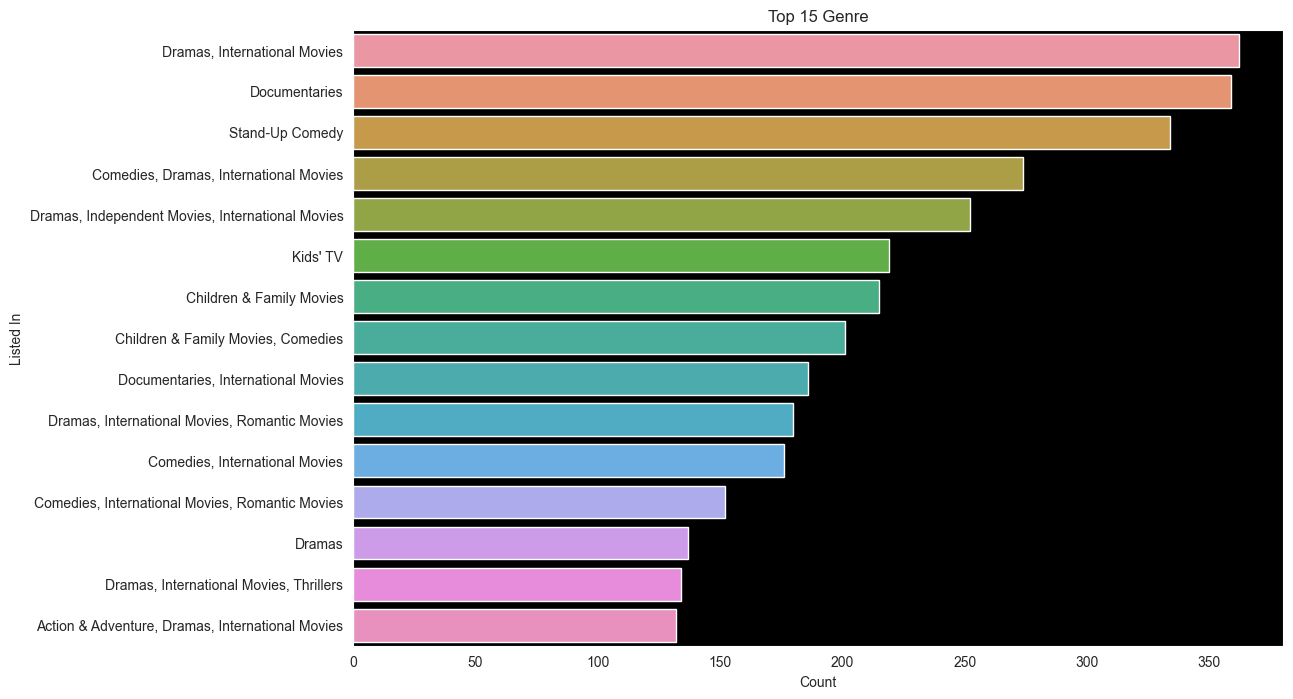

In [246]:
# Change the font size
plt.rcParams['font.size'] = 10
# font size of the ticks
# ax.tick_params(labelsize=12)
plt.figure(figsize=(12,8))
plt.grid(None)
top_15_listed_in = data['listed_in'].value_counts().sort_values(ascending=False).head(15)
ax = sns.countplot(y ="listed_in",data = data,order = top_15_listed_in.index,width = 0.8)
ax.set_facecolor('black')

ax.set_title('Top 15 Genre')
ax.set_xlabel('Count')
ax.set_ylabel('Listed In')
# plt.show()
data.listed_in.value_counts().head(10)

## Handling the missing values 

In [29]:
data.isnull().sum().sort_values(ascending= False)/ data.shape[0] * 100


director        29.908028
country          9.435676
cast             9.367549
date_added       0.113546
rating           0.045418
duration         0.034064
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [30]:
data.isnull().sum().sort_values(ascending= False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [31]:
# dropping rows for small percentage of null 
data.dropna(subset = ["duration","rating"],axis = 0,inplace = True)

In [32]:
data.shape

(8800, 12)

In [33]:
data.dropna(subset = ["date_added"],axis = 0,inplace = True)

In [34]:
# Filling and replacing missing values in country and director with Unknown ........
data['country'].fillna('Unknown', inplace=True)
data['director'].replace(np.NaN,"Unknown", inplace=True)

In [35]:
data.cast.value_counts().head(10)

cast
David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
David Spade, London Hughes, Fortune Feimster                                                                               6
Kevin Hart                                                                                                                 6
Craig Sechler                                                                                                              6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath  

In [36]:
data['cast'].replace(np.NaN,"no_cast", inplace=True)

In [37]:
data.isnull().sum().sort_values(ascending= False)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Analyze Released and Added Movies and Tv Shows yearwise

In [39]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,no_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,no_cast,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


### added Movies and Tv shows yearwise

In [40]:
data['date_added'] = pd.to_datetime(data['date_added'], format='mixed')


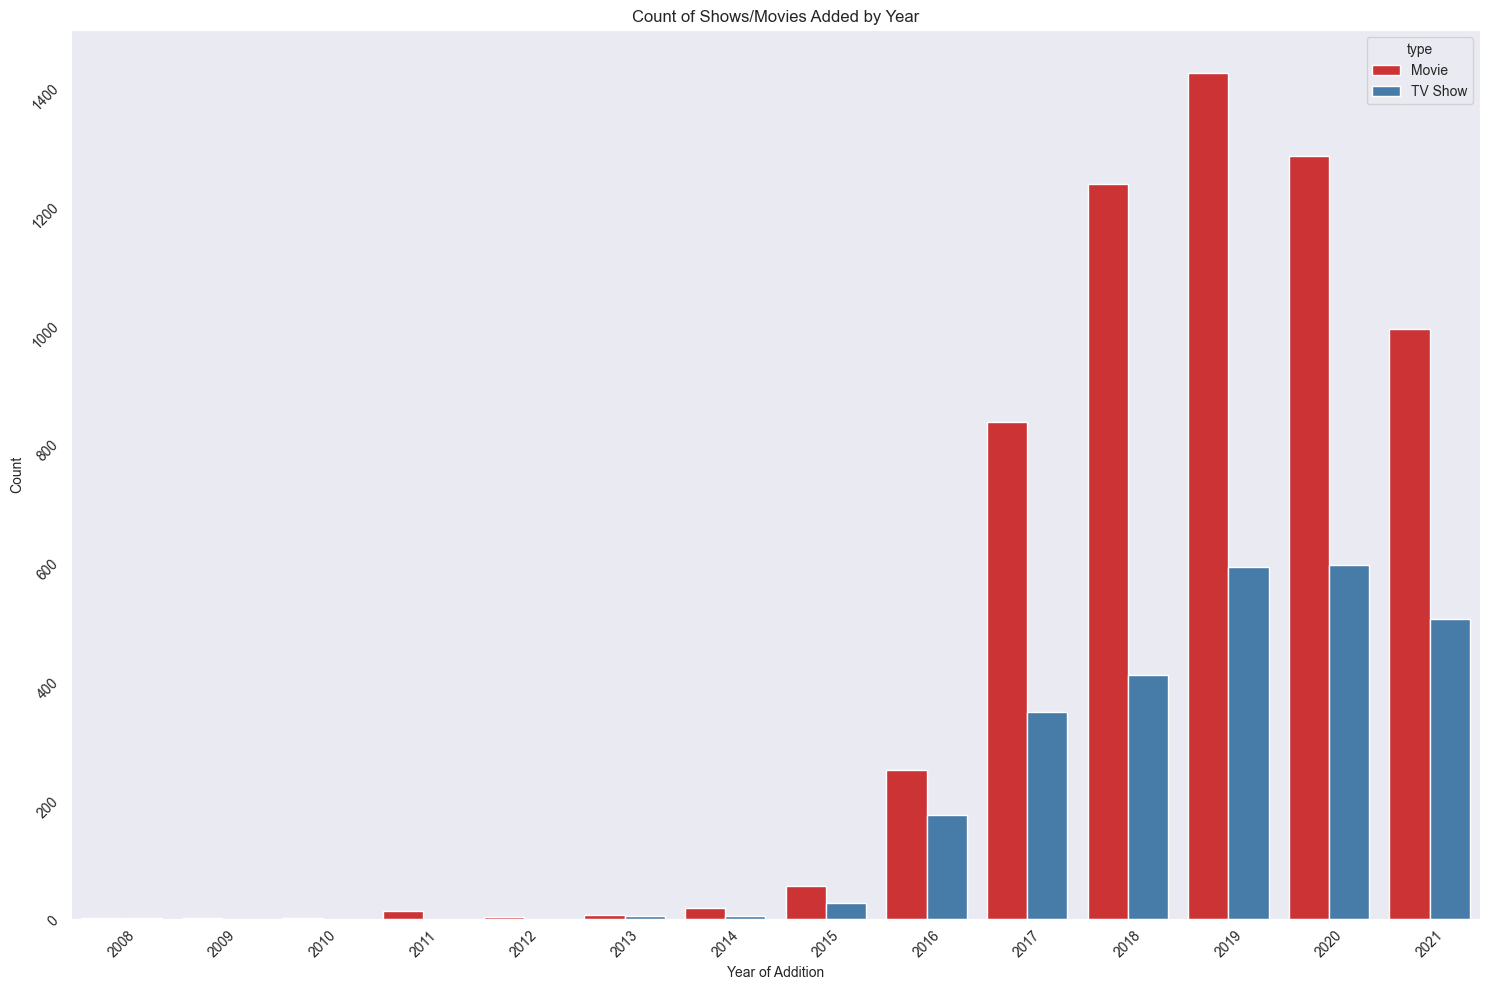

In [126]:

# Create a new column for the year the show or movie was added
data['date_added_year'] = data['date_added'].dt.year

fig, ax = plt.subplots(figsize=(15,10))
plt.grid(False)


# plt.figure(figsize=(12,8))
ax = sns.countplot(data=data, x='date_added_year', hue='type',palette='Set1')
ax.set_title('Count of Shows/Movies Added by Year')
ax.set_xlabel('Year of Addition')
ax.set_ylabel('Count')
ax.tick_params(rotation=45)

# Tighten the layout
plt.tight_layout()

# Show the plot
plt.show()

The above chart gives an overview of how movies/shows when they are added into netflix.
We can see that 

**netflix started to add more movies/shows only after 2011**

### released Movies and Tv shows yearwise

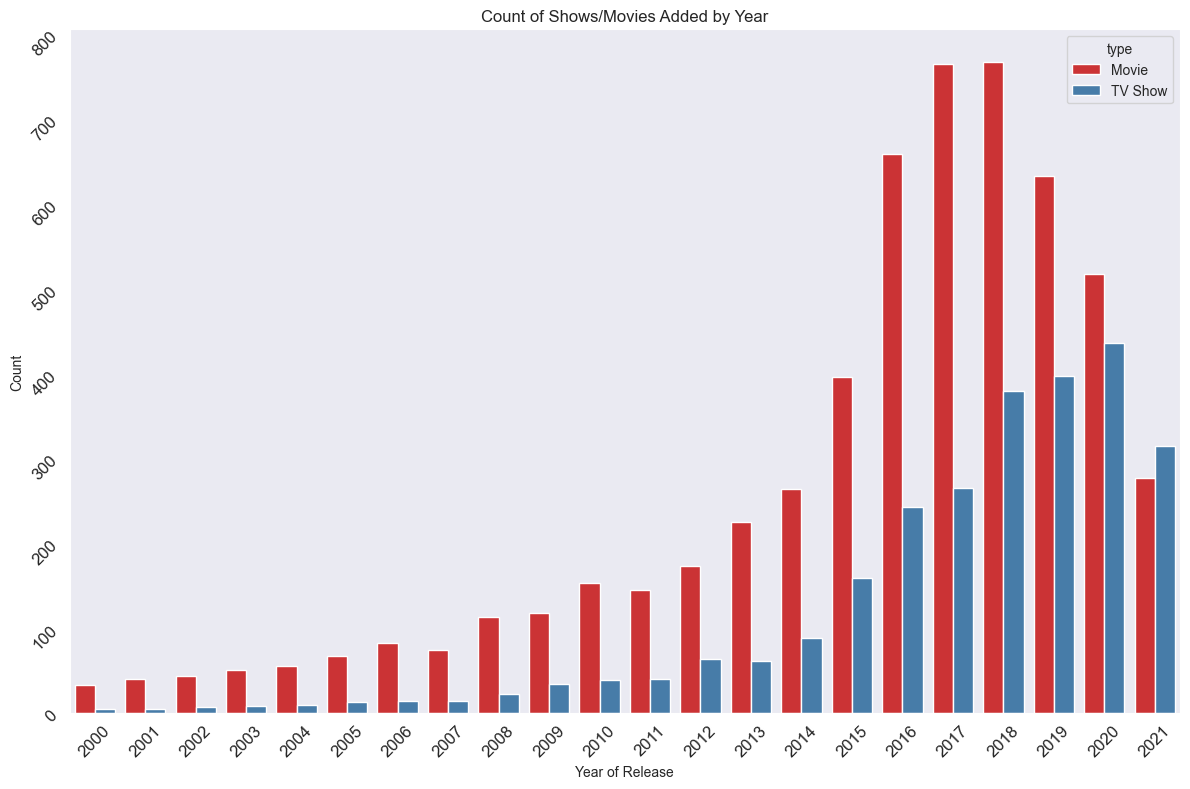

In [125]:
plt.figure(figsize=(12,8))
plt.grid(False)
ax = sns.countplot(data=data[data['release_year']>=2000], x='release_year', hue='type',palette='Set1')
ax.set_title('Count of Shows/Movies Added by Year')
ax.set_xlabel('Year of Release')
ax.set_ylabel('Count')
ax.tick_params(rotation=45)
ax.tick_params(labelsize=12)


# plt.rcParams['font.size'] = 10

# Tighten the layout
plt.tight_layout()
plt.tight_layout()


# Show the plot
plt.show()

The above chart gives an overview of how movies/shows when they are release  into netflix.


## 7.WHICH IS HIGHEST NUMBER OF MOVIES AND TV SHOW GENRES IN NETFLIX PLATFORM?

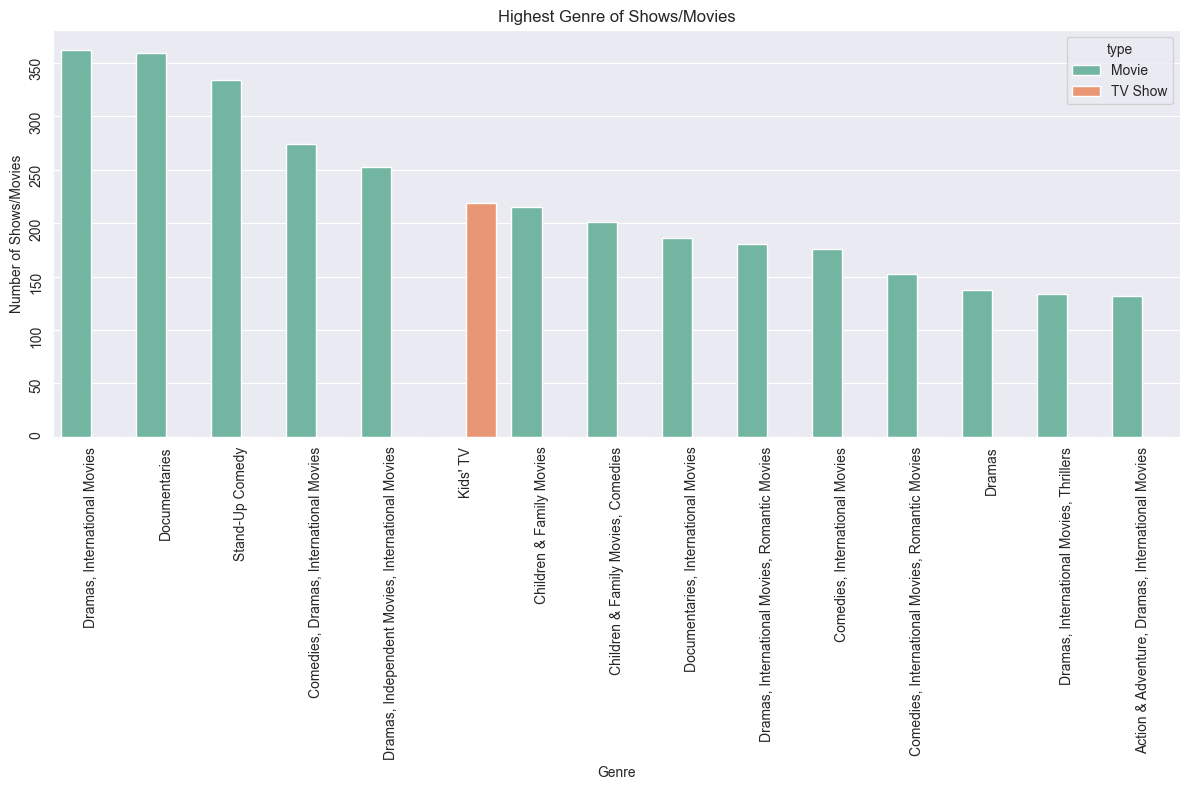

In [254]:
# Create a list of the top 15 genres
top_15_genres = data['listed_in'].value_counts().sort_values(ascending=False)[:15].index

# Plot the top 15 genres
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=data, x='listed_in', hue='type', palette='Set2', order=top_15_genres)
ax.set_title('Highest Genre of Shows/Movies')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Shows/Movies')
ax.tick_params(rotation=90)



# Tighten the layout
plt.tight_layout()

# Show the plot
plt.show()

# Analysis about trend of movies and tv shows in netflix

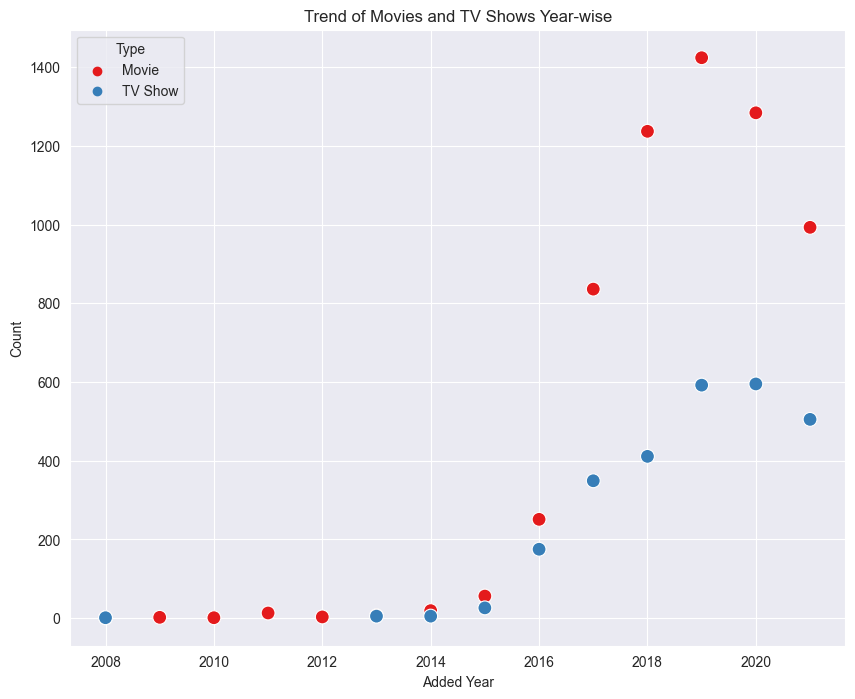

date_added_year  type     count
2008             Movie    1        1
                 TV Show  1        1
2021             Movie    993      1
2020             TV Show  595      1
                 Movie    1284     1
2019             TV Show  592      1
                 Movie    1424     1
2018             TV Show  411      1
                 Movie    1237     1
2017             TV Show  349      1
                 Movie    836      1
2016             TV Show  175      1
                 Movie    251      1
2015             TV Show  26       1
                 Movie    56       1
2014             TV Show  5        1
                 Movie    19       1
2013             TV Show  5        1
                 Movie    6        1
2012             Movie    3        1
2011             Movie    13       1
2010             Movie    1        1
2009             Movie    2        1
2021             TV Show  505      1
Name: count, dtype: int64

In [163]:
trend_data = data.groupby(['date_added_year', 'type']).size().reset_index(name='count')


plt.figure(figsize=(10, 8))
sns.scatterplot(data=trend_data, x='date_added_year', y='count', hue='type', s=100, palette='Set1')
plt.title('Trend of Movies and TV Shows Year-wise')
plt.xlabel('Added Year')
plt.ylabel('Count')
plt.legend(title='Type', loc='upper left')
plt.show()
trend_data.value_counts()

###  Downloading cleaned dataset

In [311]:
data.to_csv('cleaned_data_csv.csv')

## Top 10 Actor with the most Movies

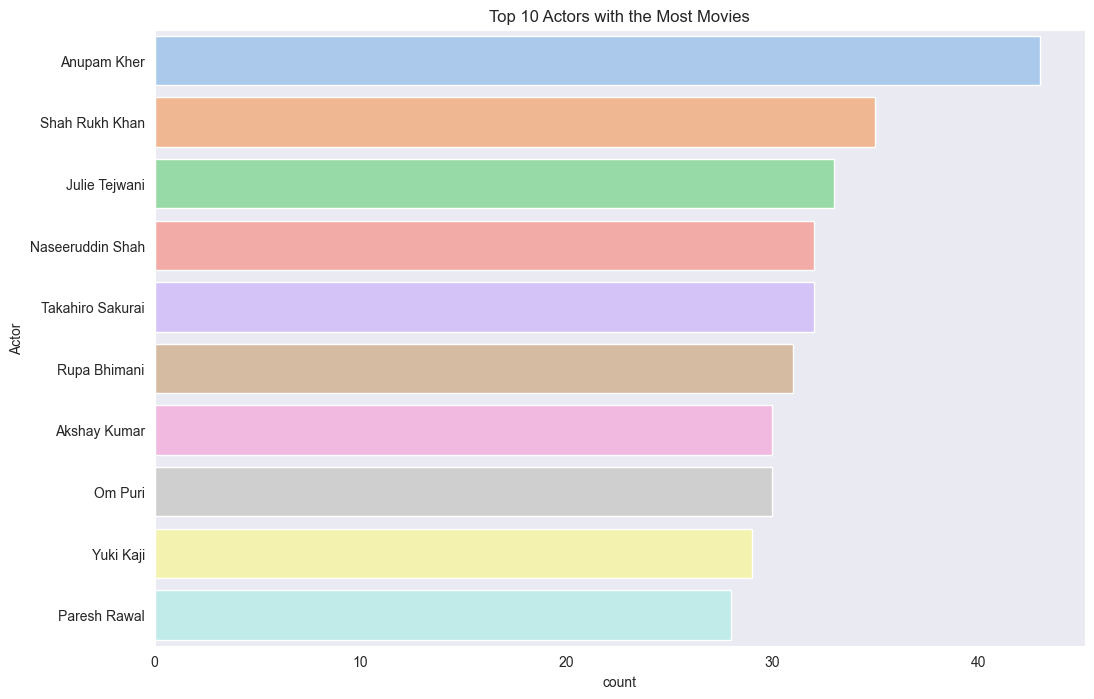

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64

In [124]:

# Create a new DataFrame with the cast information
cast_shows = data[data.cast != 'no_cast'].set_index('title').cast.str.split(', ',expand = True).stack().reset_index(level=1,drop=True)
plt.figure(figsize=(12,8))
plt.grid(False)
# Get the top 10 actors with the most movies
# filtered_cast_shows = cast_shows.value_counts().index[:10] 

# Create a count plot
ax = sns.countplot(y=cast_shows, order=cast_shows.value_counts().index[:10], palette='pastel')


# Set the title and labels

plt.title('Top 10 Actors with the Most Movies')
ax.set_ylabel('Actor')

# Show the plot
plt.show()
# top 10 actors with the most movies
cast_shows.value_counts()[:10]



# Analysis of Movies

In [139]:
# Create a DataFrame of movies
movies_df = data[data['type'] == 'Movie']

# Remove the " min" from the duration strings
movies_df['duration'] = movies_df['duration'].apply(lambda x: x.replace(" min", "") if 'min' in x else x)

# Convert the duration strings to integers
movies_df['duration'] = movies_df['duration'].astype('int64', errors='ignore')

# Print the summary statistics of the duration column
print(movies_df['duration'].describe())

# Find the shortest and longest movies
# shortest_movie = movies_df[movies_df['duration'] == movies_df['duration'].min()]
# longest_movie = movies_df[movies_df['duration'] == movies_df['duration'].max()]



count    6126.000000
mean       99.584884
std        28.283225
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64


In [140]:
shortest_movie = movies_df[movies_df['duration'] == np.min(movies_df.duration)]
shortest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",no_cast,United States,2019-06-04,2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",2019


In [158]:
longest_movie = movies_df[movies_df.duration == np.max(movies_df.duration)]
longest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
4253,s4254,Movie,Black Mirror: Bandersnatch,Unknown,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018


to see rating of longest movie

In [180]:
longest_movie.rating.value_counts()

rating
TV-MA    1
Name: count, dtype: int64

In [157]:
print(shortest_movie[['title', 'cast']])

print(longest_movie[['title', 'cast']])


       title     cast
3777  Silent  no_cast
                           title  \
4253  Black Mirror: Bandersnatch   

                                                   cast  
4253  Fionn Whitehead, Will Poulter, Craig Parkinson...  


In [ ]:
# we can see greater than 100 min movies 
longest_movies = movies_df[movies_df.duration >= 100]
longest_movies

# Analysis of TV shows

In [177]:
#make a dataframe for TV Shows only

tv_shows= data[data['type'] == 'TV Show']
tv_shows = tv_shows.copy(deep=True)
tv_shows.head(2)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021


## WHICH MOST NUMBER OF TV SHOW SEASON IN NETFLIX PLATFORM?


In [178]:
show_data = tv_shows['duration'].value_counts()

duration
1 Season      1791
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: count, dtype: int64

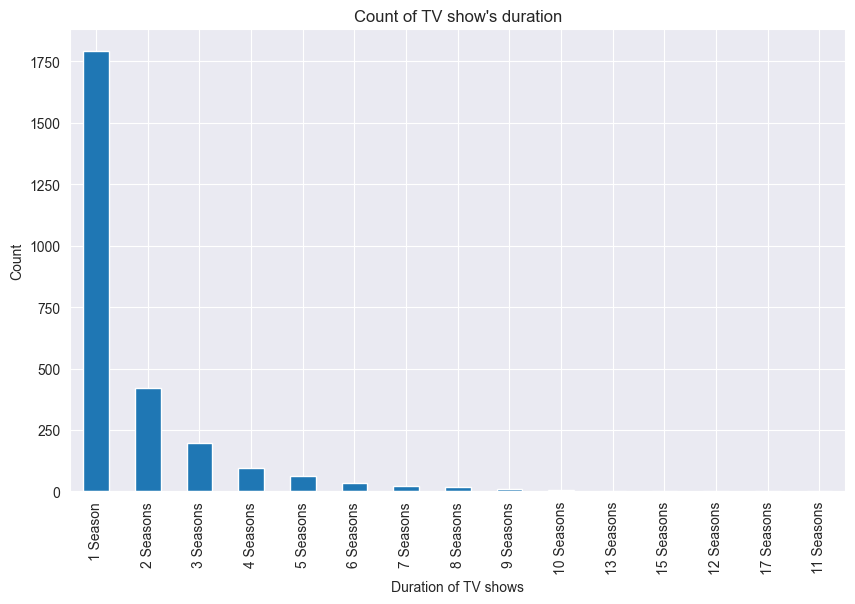

In [179]:
plt.figure(figsize=(10,6))
plt.grid(False)

show_data.plot(kind='bar')
plt.xlabel('Duration of TV shows')
plt.ylabel('Count')
plt.title('Count of TV show\'s duration')
tv_shows['duration'].value_counts()

* TV shows with one season is more available

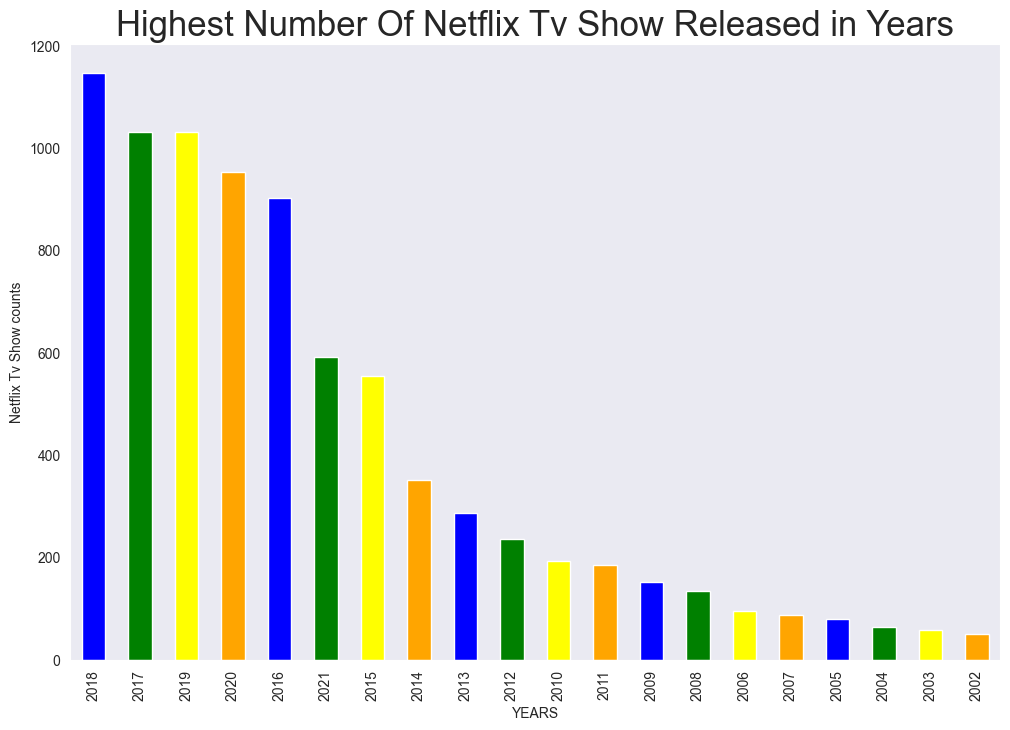

In [183]:
plt.figure(figsize=(12, 8))
data['release_year'].value_counts()[:20].plot(kind="bar",color=['blue','green','yellow','orange']) #plotting the bar chart in matplotlib library with colors
plt.title('Highest Number Of Netflix Tv Show Released in Years',fontsize=25) #Note labelling the data
plt.xlabel('YEARS',fontsize=10)                         #Note labelling the x-label
plt.ylabel('Netflix Tv Show counts',fontsize=10)        #Note labelling the y-label
plt.grid(None)
plt.show()

In [114]:
tv_shows["listed_in"] = tv_shows["listed_in"].str.split(",")

In [115]:
tv_shows = tv_shows.explode('listed_in')

In [116]:
tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6109 entries, 1 to 8803
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          6109 non-null   object        
 1   type             6109 non-null   object        
 2   title            6109 non-null   object        
 3   director         6109 non-null   object        
 4   cast             6109 non-null   object        
 5   country          6109 non-null   object        
 6   date_added       6109 non-null   datetime64[ns]
 7   release_year     6109 non-null   int64         
 8   rating           6109 non-null   object        
 9   duration         6109 non-null   object        
 10  listed_in        6109 non-null   object        
 11  description      6109 non-null   object        
 12  date_added_year  6109 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(10)
memory usage: 644.3+ KB


In [117]:
tv_shows["listed_in"] = tv_shows["listed_in"].apply(lambda x:x.strip())

Text(0.5, 1.0, 'TV Shows categories')

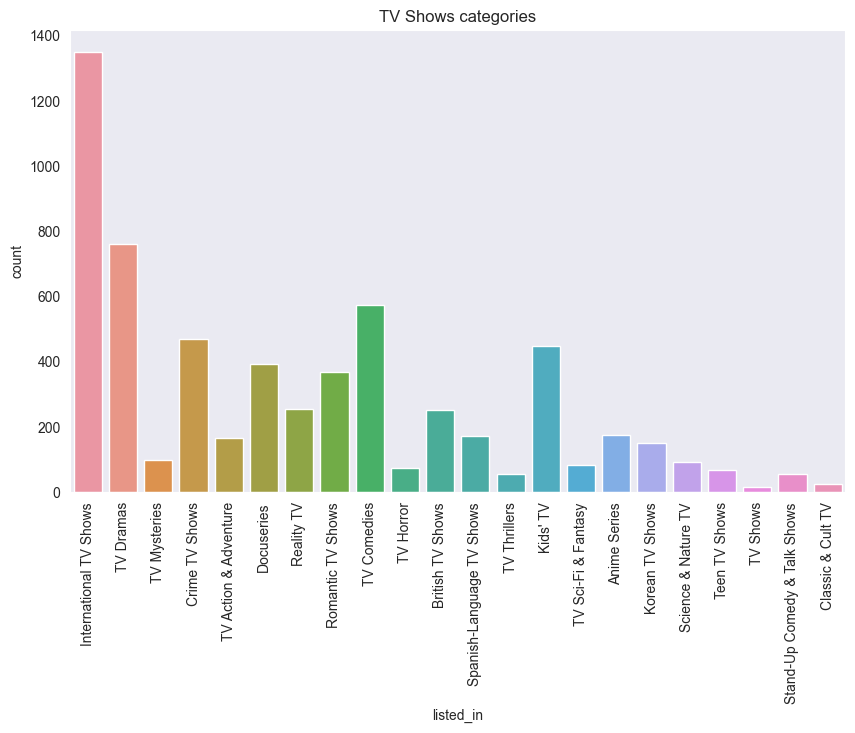

In [119]:
plt.figure(figsize=(10,6))
plt.grid(False)

sns.countplot(data=tv_shows,x="listed_in")
plt.xticks(rotation=90)
plt.title("TV Shows categories")

# DATA EXACTRATIONS FOR MOVIES

In [207]:
datam=data.loc[data['type']=='Movie']  #data exactration from Netflix_Shows dataset into Movie types.

In [208]:
datam.to_csv('netflix_movies.csv')    #output dataset for netflix movies 

In [210]:
datam.head(2)     #read this data for movies in netflix platform

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,no_cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021


In [211]:
datam['duration']=datam['duration'].astype('int')   #Converts the given columns to "int64" type

In [212]:
datam.set_index('title',inplace=True)  #setting index as title for movies dataset

## WHICH MOVIES IN NETFLIX HAS MORE DURATION OF TIMES IN MINUTES?

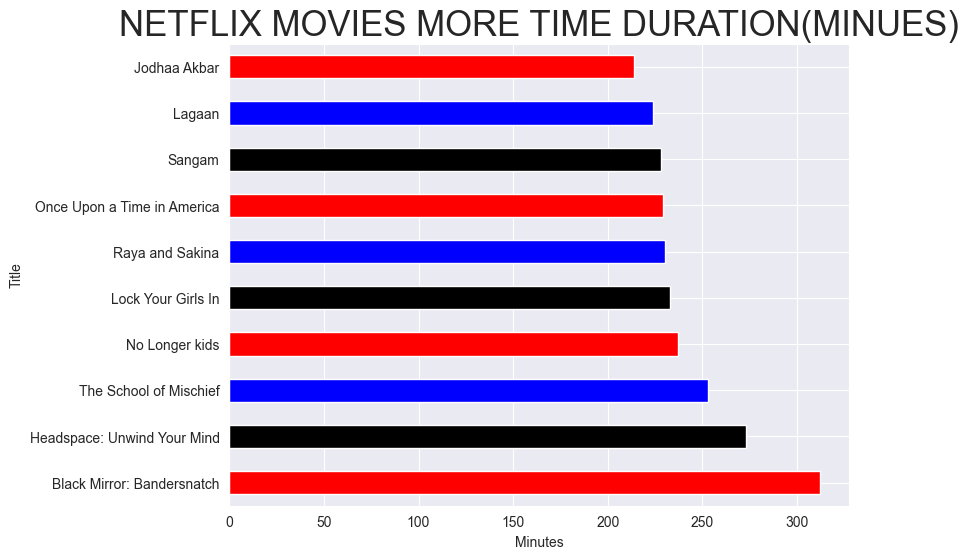

In [215]:
plt.figure(figsize=(8,6))
datam.duration.sort_values(ascending=False)[:10].plot(kind="barh",color=['red','black','blue']) #notes that BARH plot in matplotlib library with colors  
plt.title('NETFLIX MOVIES MORE TIME DURATION(MINUES)',fontsize=25)   #Note labelling the title
plt.xlabel('Minutes')  #Note labelling X-labels
plt.ylabel('Title')    #Note labelling Y-labels
plt.show()

## WHICH COUNTRY RELEASES MOST NUMBER MOVIES IN NETFLIX?

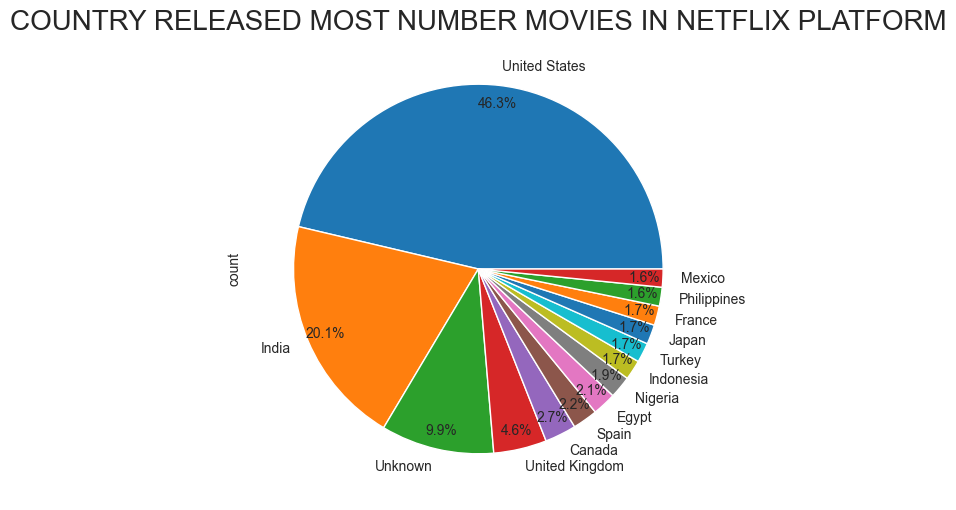

In [221]:
plt.figure(figsize=(6,6))
plt.grid(None)
datam.country.value_counts()[:14].plot(kind='pie',autopct='%.1f%%',pctdistance=0.9) #plotting the data with pie chart with country most relased.
plt.title('COUNTRY RELEASED MOST NUMBER MOVIES IN NETFLIX PLATFORM',fontsize=20) #note the labelling the title
plt.show()

In [222]:
datam.reset_index('title',inplace=True)  #reseting the index into previous index.

In [223]:
datam['listed_in'].drop_duplicates(inplace=True)    #drop the duplicates

## WHICH GENRES MOVIES WERE RELEASED MOSTLY IN NETFLIX PLATFORM?

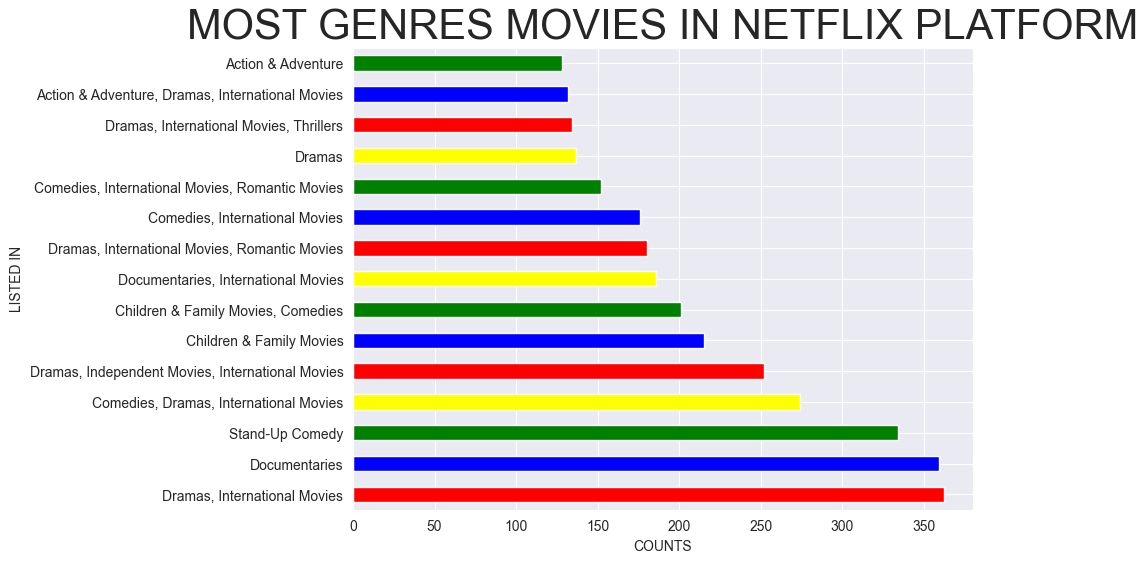

In [228]:
plt.figure(figsize=(8,6))
datam['listed_in'].value_counts()[:15].plot(kind='barh',color=['red','blue','green','yellow']) #plotting the barh chart in matplotlib library with colors
plt.title('MOST GENRES MOVIES IN NETFLIX PLATFORM',fontsize=30) #Note labelling the title
plt.xlabel('COUNTS')       #Note labelling the x-label
plt.ylabel('LISTED IN')   #Note labelling the y-label
plt.show()

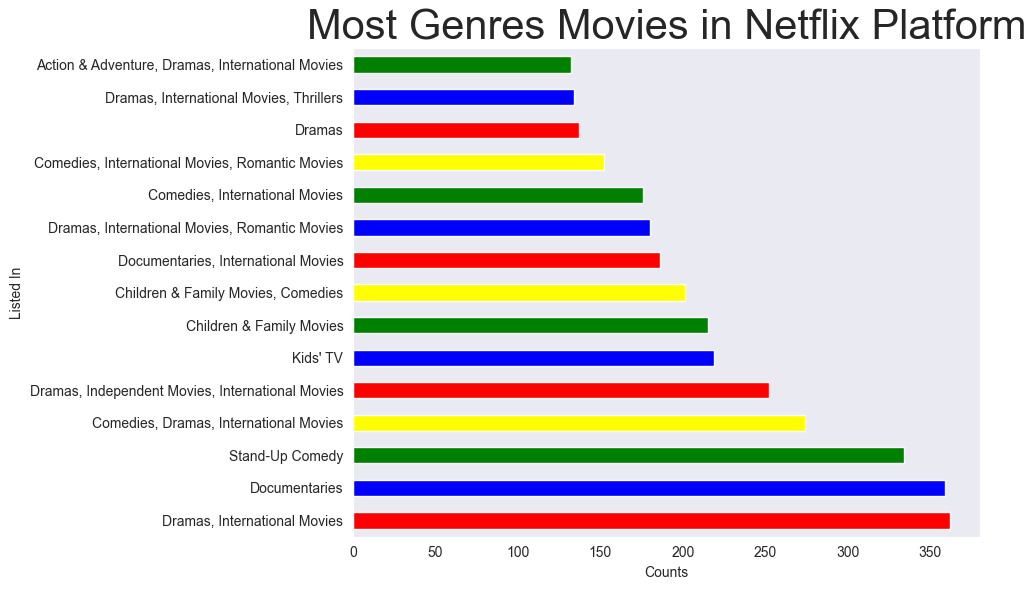

In [232]:
# Create a list of the top 15 listed_in genres
# top_15_listed_in = data['listed_in'].value_counts()[:15].index

# Plot the top 15 listed_in genres
plt.figure(figsize=(10,6))
ax = data['listed_in'].value_counts()[:15].plot(kind='barh', color=['red', 'blue', 'green', 'yellow'])

# Set the title and labels
ax.set_title('Most Genres Movies in Netflix Platform', fontsize=30)
ax.set_xlabel('Counts')
ax.set_ylabel('Listed In')

ax.grid(False)

# Tighten the layout
plt.tight_layout()

# Show the plot
plt.show()

# DATA EXACTRATIONS FOR TV SHOWS

In [234]:
datas=data.loc[data['type']=='TV Show']     #data exactration from Netflix_Shows dataset into TV SHOW types.

In [235]:
datas.to_csv('netflix_tvshow.csv')      #output dataset for netflix tv shows

## WHICH MOST NUMBER OF TV SHOW SEASON IN NETFLIX PLATFORM?

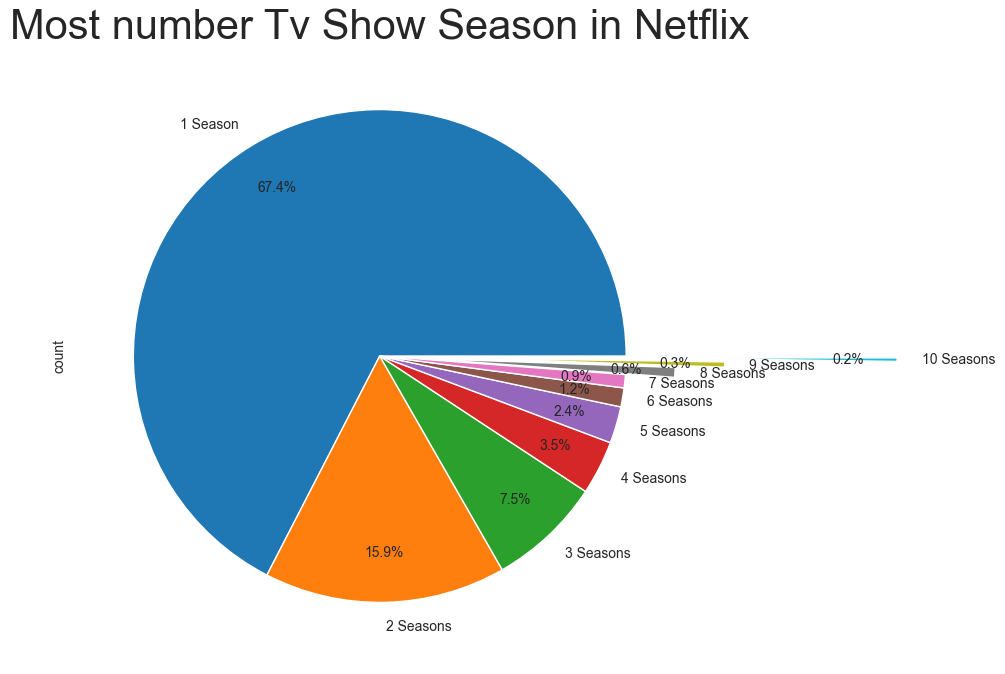

In [244]:
plt.figure(figsize=(12, 8))

explode=[0,0,0,0,0,0,0,0.2,0.4,1.1]
datas.duration.value_counts()[:10].plot(kind='pie',hatch='title',explode=explode,autopct='%.1f%%',pctdistance=0.8) #plotting the pie chart in matplotlib with explode datas 
plt.title('Most number Tv Show Season in Netflix',fontsize=30)   #Note labelling the title
plt.show()

## WHICH HIS HIGHEST NUMBER OF NETFLIX TV SHOW RELEASED IN YEARS?

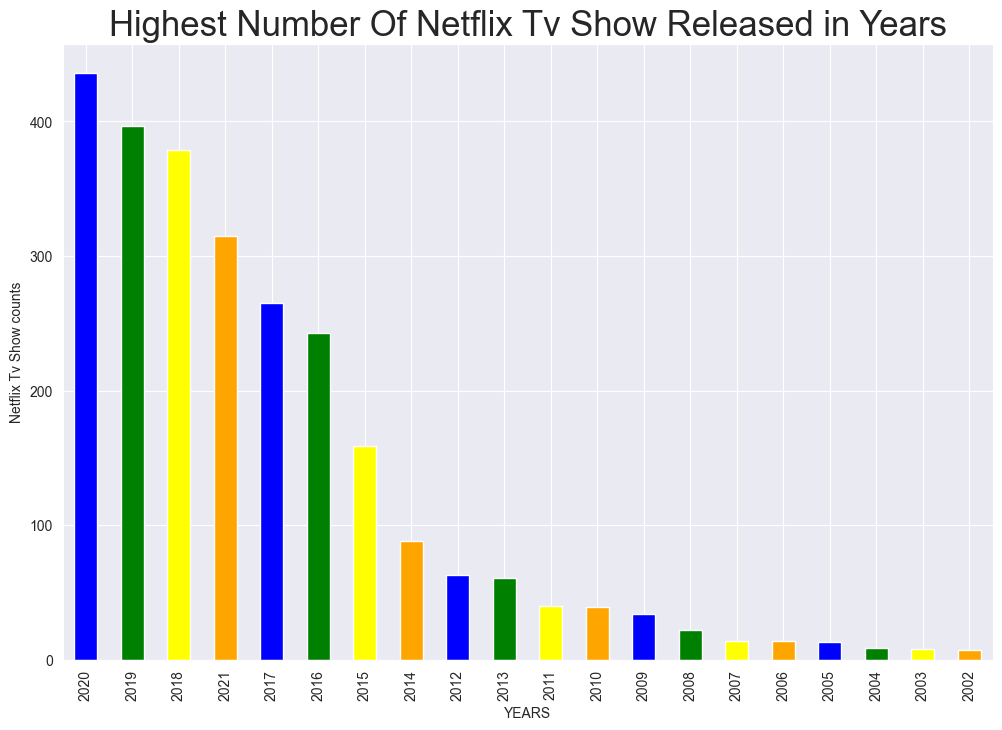

In [257]:
plt.figure(figsize=(12, 8))
datas['release_year'].value_counts()[:20].plot(kind="bar",color=['blue','green','yellow','orange']) #plotting the bar chart in matplotlib library with colors
plt.title('Highest Number Of Netflix Tv Show Released in Years',fontsize=25) #Note labelling the data
plt.xlabel('YEARS',fontsize=10)                         #Note labelling the x-label
plt.ylabel('Netflix Tv Show counts',fontsize=10)        #Note labelling the y-label
plt.show()

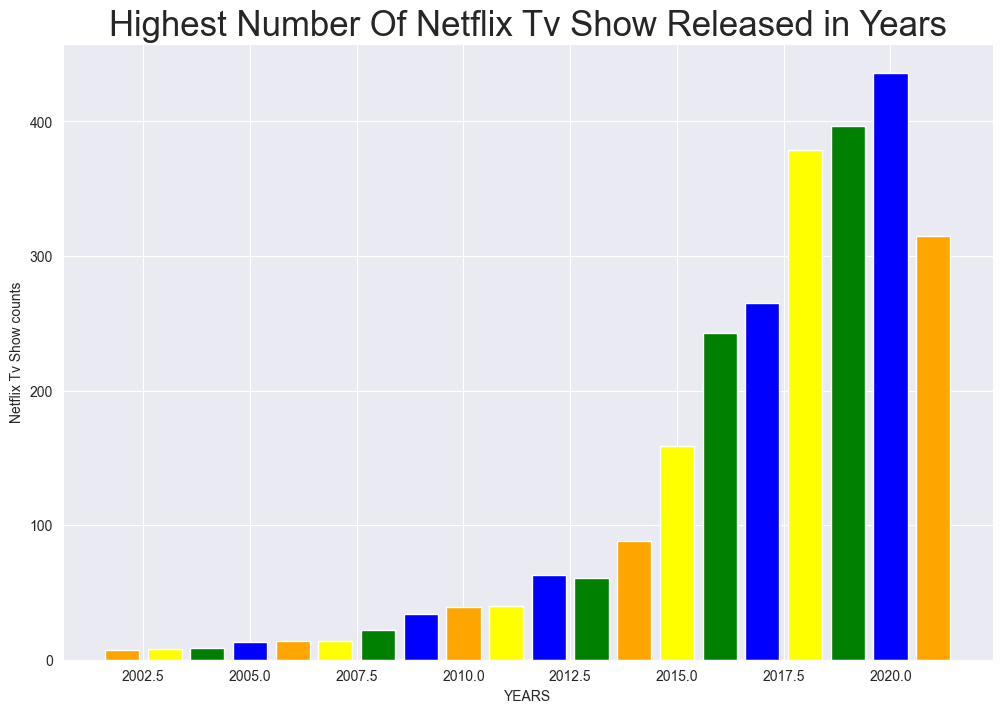

In [258]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(datas['release_year'].value_counts()[:20].index, datas['release_year'].value_counts()[:20], color=['blue', 'green', 'yellow', 'orange'])

# Set the title and labels
ax.set_title('Highest Number Of Netflix Tv Show Released in Years', fontsize=25)
ax.set_xlabel('YEARS', fontsize=10)
ax.set_ylabel('Netflix Tv Show counts', fontsize=10)

# Show the plot
plt.show()

## WHICH IS HIGHEST NUMBER OF TV SHOW GENRES IN NETFLIX PLATFORM?

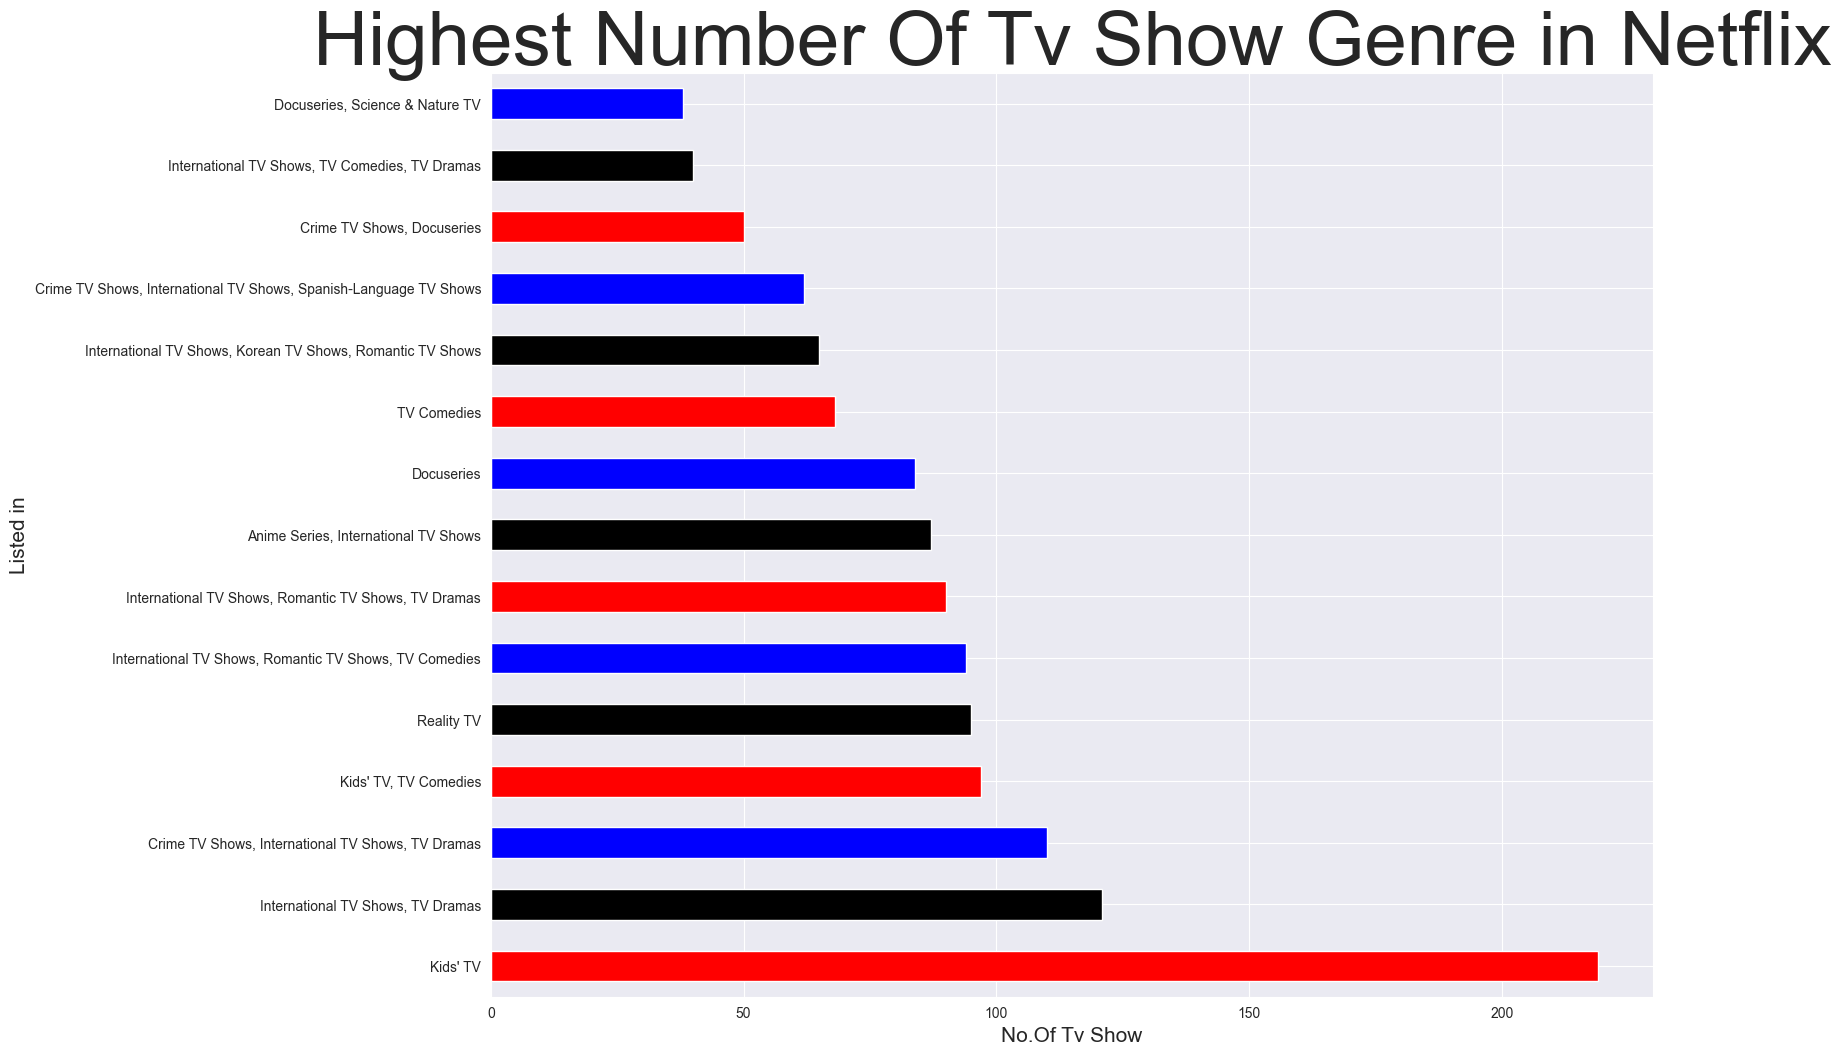

In [262]:
plt.figure(figsize=(15,12))
datas['listed_in'].value_counts()[:15].plot(kind='barh',color=['red','black','blue']) #plotting the barh chart in matplotlib with colors
plt.title('Highest Number Of Tv Show Genre in Netflix',fontsize=55)  #Note labelling the title
plt.xlabel('No.Of Tv Show',fontsize=15)      #Note labelling the x-label
plt.ylabel('Listed in',fontsize=15)          #Note labelling the y-label
plt.show()